In [9]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing dataset
datas=pd.read_csv('data_.csv')
datas

,Sno,Temperature,Pressure
0,1.0,0.0,0.0002
1,2.0,20.0,0.0012
2,3.0,40.0,0.0060
3,4.0,60.0,0.0300
4,5.0,80.0,0.0900
...,...,...,...
994,NaN,NaN,NaN
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN


In [10]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Position_Salaries dataset
position_salaries_path = "Position_Salaries.csv"
df_salaries = pd.read_csv(position_salaries_path)

# Extract features and target variable
X_salaries = df_salaries.iloc[:, 1:2].values  # Position level
y_salaries = df_salaries.iloc[:, 2].values  # Salary


In [11]:

# Load Advertising dataset
advertising_path = "Advertising.xlsx"
df_ads = pd.read_excel(advertising_path, sheet_name=0)  # Load first sheet

# Extract features and target variable
X_ads = df_ads[['TV', 'Radio', 'Newspaper']].values  # Ad expenditures
y_ads = df_ads['Sales'].values  # Sales


In [12]:

# Function to apply Polynomial Regression and compute performance metrics
def polynomial_regression(X, y, degree=4):
    # Transform features into polynomial form
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predictions
    y_pred = model.predict(X_poly)

    # Compute metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return model, poly, mse, rmse, r2



In [13]:

# Apply Polynomial Regression on Position_Salaries dataset
model_salaries, poly_salaries, mse_salaries, rmse_salaries, r2_salaries = polynomial_regression(X_salaries, y_salaries)

# Apply Polynomial Regression on Advertising dataset
model_ads, poly_ads, mse_ads, rmse_ads, r2_ads = polynomial_regression(X_ads, y_ads, degree=2)  # Using degree=2 for multi-variable

# Results
results = {
    "Position Salaries": {"MSE": mse_salaries, "RMSE": rmse_salaries, "R2 Score": r2_salaries},
    "Advertising Sales": {"MSE": mse_ads, "RMSE": rmse_ads, "R2 Score": r2_ads},
}

results

{'Position Salaries': {'MSE': 210343822.8438203,
  'RMSE': 14503.234909626897,
  'R2 Score': 0.9973922891706614},
 'Advertising Sales': {'MSE': 0.3655019728219211,
  'RMSE': 0.604567591607358,
  'R2 Score': 0.9865057435307856}}

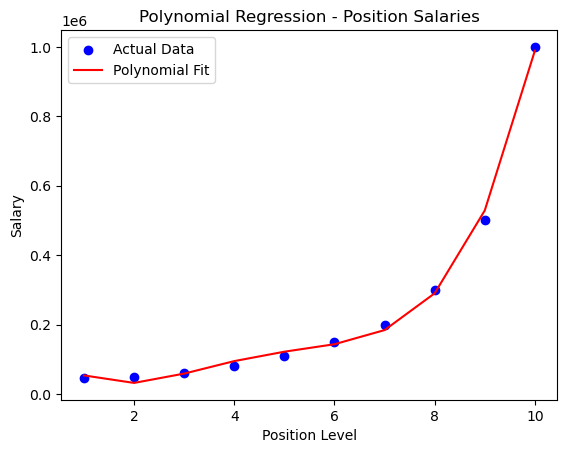

In [14]:
# Visualizing Polynomial Regression results for Position Salaries
plt.scatter(X_salaries, y_salaries, color='blue', label="Actual Data")
plt.plot(X_salaries, model_salaries.predict(poly_salaries.fit_transform(X_salaries)), color='red', label="Polynomial Fit")
plt.title('Polynomial Regression - Position Salaries')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()



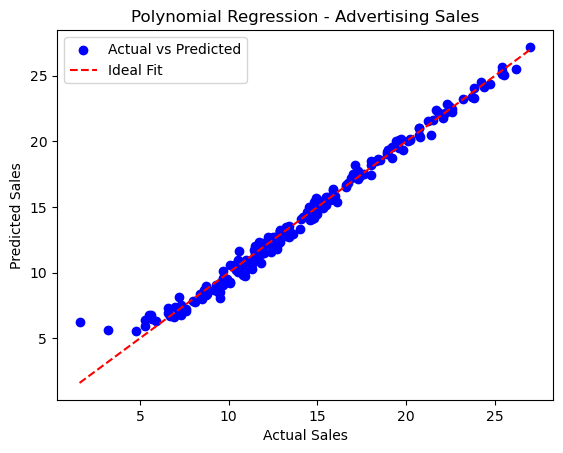

In [15]:
# Visualizing Polynomial Regression results for Advertising Sales
y_ads_pred = model_ads.predict(poly_ads.fit_transform(X_ads))

plt.scatter(y_ads, y_ads_pred, color='blue', label="Actual vs Predicted")
plt.plot([min(y_ads), max(y_ads)], [min(y_ads), max(y_ads)], color='red', linestyle='dashed', label="Ideal Fit")
plt.title('Polynomial Regression - Advertising Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()